In [1]:
import os
scan_dir = 'Dataset/Scans/'
res_dir = 'Dataset/Cropped_Images/'
paths = []
vocabulary = [
    [
        "Ακρόπολη", "Αναφιώτικα", "Αμπελόκηποι", "Βούλα", "Βοτανικός", 
        "Γκάζι", "Γουδί", "Ελαιώνας", "Εξάρχεια", "Ζάππειο", 
        "Θησείο", "Κεραμεικός", "Κολωνάκι", "Κουκάκι", "Κυψέλη"
    ],
    [
        "Μεταξουργείο", "Μοναστηράκι", "Νεάπολη", "Ομόνοια", "Παγκράτι",
        "Πατήσια", "Πειραιάς", "Πεντάγωνο", "Πλάκα", "Ρουφ", 
        "Σεπόλια", "Σύνταγμα", "Υμηττός", "Χαλάνδρι", "Ωρωπός"
    ]
]

In [12]:
def crop_image(filename):

    from PIL import Image
    import os

    res_dir = 'Dataset/Cropped_Images/'
    file = 'Dataset/Scans/'+ filename

    vocabulary = [
        [
            "Ακρόπολη", "Αναφιώτικα", "Αμπελόκηποι", "Βούλα", "Βοτανικός", 
            "Γκάζι", "Γουδί", "Ελαιώνας", "Εξάρχεια", "Ζάππειο", 
            "Θησείο", "Κεραμεικός", "Κολωνάκι", "Κουκάκι", "Κυψέλη"
        ],
        [
            "Μεταξουργείο", "Μοναστηράκι", "Νεάπολη", "Ομόνοια", "Παγκράτι",
            "Πατήσια", "Πειραιάς", "Πεντάγωνο", "Πλάκα", "Ρουφ", 
            "Σεπόλια", "Σύνταγμα", "Υμηττός", "Χαλάνδρι", "Ωρωπός"
        ]
    
    ]

    # starting coordinates
    x = 410
    y = 485
    image_width = 400
    image_height = 102
    edge_offset = 10

    with Image.open(file) as img:
        img.load()
        for i in range (2):

            for j in range (15):
                cropped_img = img.crop(
                        (x+ edge_offset, y + edge_offset, x + image_width - edge_offset, y + image_height - edge_offset/4)
                    )
                y += image_height + 1

                if not os.path.exists(res_dir + vocabulary[i][j]):
                    os.makedirs(res_dir + vocabulary[i][j])
                
                paths.append(res_dir + vocabulary[i][j] + '/' + vocabulary[i][j] + '_' + filename)
                cropped_img.save(paths[len(paths)-1])

            x = 410 + image_width + 330
            y = 485
        

In [13]:
for filename in os.listdir(scan_dir):
    crop_image(filename)

In [14]:
def split_dataset(paths):
    split_idx = int(0.7 * len(paths))
    train_paths = paths[:split_idx]
    test_paths = paths[split_idx:]

    val_split_idx = int(0.5 * len(test_paths))
    validation_paths = test_paths[:val_split_idx]
    test_paths = test_paths[val_split_idx:]

    assert len(paths) == len(train_paths) + len(validation_paths) + len(test_paths)

    return train_paths, test_paths, validation_paths

In [15]:
def get_labels(paths):
    labels = []
    
    for (i, path) in enumerate(paths):
        label = path.split(res_dir)[1]
        label = label.split("/")[0]

        labels.append(label)

    return labels

In [16]:
import numpy as np

# shuffle the paths
np.random.shuffle(paths)

train_paths, test_paths, validation_paths = split_dataset(paths)
train_labels = get_labels(train_paths)
print(train_labels)
test_labels = get_labels(test_paths)
validation_labels = get_labels(validation_paths)
print(len(train_paths))
print(len(test_paths))
print(len(validation_paths))


['Χαλάνδρι', 'Αναφιώτικα', 'Αναφιώτικα', 'Πατήσια', 'Θησείο', 'Παγκράτι', 'Πατήσια', 'Ομόνοια', 'Υμηττός', 'Πλάκα', 'Ωρωπός', 'Εξάρχεια', 'Εξάρχεια', 'Αμπελόκηποι', 'Εξάρχεια', 'Σεπόλια', 'Νεάπολη', 'Ελαιώνας', 'Νεάπολη', 'Κυψέλη', 'Ακρόπολη', 'Κεραμεικός', 'Ελαιώνας', 'Γουδί', 'Ωρωπός', 'Κολωνάκι', 'Αναφιώτικα', 'Γκάζι', 'Βούλα', 'Βοτανικός', 'Βούλα', 'Σύνταγμα', 'Ωρωπός', 'Πειραιάς', 'Θησείο', 'Παγκράτι', 'Βούλα', 'Σεπόλια', 'Βούλα', 'Πλάκα', 'Ακρόπολη', 'Εξάρχεια', 'Νεάπολη', 'Εξάρχεια', 'Αμπελόκηποι', 'Ομόνοια', 'Σεπόλια', 'Μοναστηράκι', 'Αμπελόκηποι', 'Αμπελόκηποι', 'Ρουφ', 'Ελαιώνας', 'Πατήσια', 'Πεντάγωνο', 'Ομόνοια', 'Ρουφ', 'Νεάπολη', 'Θησείο', 'Σύνταγμα', 'Κουκάκι', 'Πατήσια', 'Υμηττός', 'Πλάκα', 'Κεραμεικός', 'Κολωνάκι', 'Ρουφ', 'Κουκάκι', 'Θησείο', 'Εξάρχεια', 'Πειραιάς', 'Αναφιώτικα', 'Ελαιώνας', 'Σύνταγμα', 'Υμηττός', 'Εξάρχεια', 'Νεάπολη', 'Υμηττός', 'Ακρόπολη', 'Θησείο', 'Γουδί', 'Πατήσια', 'Ζάππειο', 'Γουδί', 'Βούλα', 'Ομόνοια', 'Πατήσια', 'Ελαιώνας', 'Χαλάνδρι', 'Υμητ

In [ ]:
# save the data up to now
# labels
labels_and_paths_location = 'labels_and_paths/'
if not os.path.exists(labels_and_paths_location):
    os.makedirs(labels_and_paths_location)
np.save(labels_and_paths_location + 'train_labels.npy', train_labels)
np.save(labels_and_paths_location + 'validation_labels.npy', validation_labels)
np.save(labels_and_paths_location + 'test_labels.npy', test_labels)
# paths
np.save(labels_and_paths_location + 'train_paths.npy', train_paths)
np.save(labels_and_paths_location + 'validation_paths.npy', validation_paths)
np.save(labels_and_paths_location + 'test_paths.npy', test_paths)

model_dictionary = np.unique(vocabulary)
np.save(labels_and_paths_location + 'model_dictionary.npy', model_dictionary)


In [2]:
IMAGE_WIDTH = 200
IMAGE_HEIGHT = 200

import cv2
import numpy as np

# resize the image without distorting it
def resize_image(img, size=(IMAGE_WIDTH, IMAGE_HEIGHT)):
    h, w = img.shape[:2]
    c = img.shape[2] if len(img.shape)>2 else 1
    if h == w: 
        return cv2.resize(img, size, cv2.INTER_AREA)
    dif = h if h > w else w
    interpolation = cv2.INTER_AREA if dif > (size[0]+size[1])//2 else cv2.INTER_CUBIC
    x_pos = (dif - w)//2
    y_pos = (dif - h)//2
    if len(img.shape) == 2:
        mask = np.ones((dif, dif), dtype=img.dtype)
        mask = cv2.bitwise_not(mask)               # Added mask inversion here
        mask[y_pos:y_pos+h, x_pos:x_pos+w] = img[:h, :w]
    else:
        mask = np.ones((dif, dif, c), dtype=img.dtype)
        mask = cv2.bitwise_not(mask)               # Added mask inversion here
        mask[y_pos:y_pos+h, x_pos:x_pos+w, :] = img[:h, :w, :]
    return cv2.resize(mask, size, interpolation)

Ωρωπός


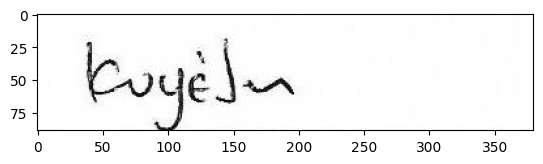

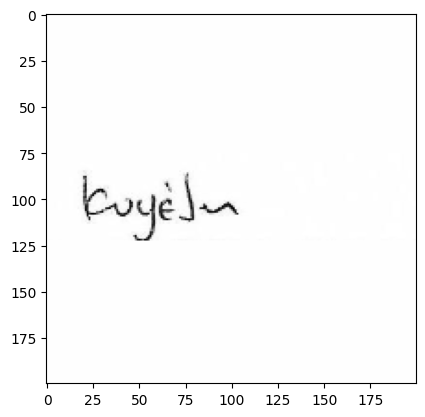

In [17]:
import tensorflow as tf
import matplotlib.pyplot as plt
labels_and_paths_location = 'labels_and_paths/'

train_img_paths = np.load(labels_and_paths_location + 'train_paths.npy')
# difference between original and resized pictures
img_array = plt.imread(train_img_paths[10])
img_array = img_array[...,::-1]
img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY) # change to gray
print(train_labels[10])
plt.imshow(img_array, cmap='gray')  # graph it
plt.show()
img_array = resize_image(img_array)
plt.imshow(img_array, cmap='gray')  # graph it
plt.show()

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2

gamma = 2

def create_dataset(img_paths, labels):
    dataset = []
    lookUpTable = np.empty((1,256), np.uint8)

    for i in range(256):
        lookUpTable[0,i] = np.clip(pow(i / 255.0, gamma) * 255.0, 0, 255)

    for index, path in enumerate(img_paths):
        # convert to array (cv2 can't read jpg so we have to first reaed it with matplolib)
        img_array = plt.imread(path)
        img_array = img_array[...,::-1] #change colors to match cv2
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY) # change to gray
        img_array = cv2.LUT(img_array, lookUpTable)
        img_array = resize_image(img_array)  
        # find the first occurence of the word in the uniquel labels list
        unique_label_index = np.where(model_dictionary == labels[index])[0][0]
        # normalise the colours of the image 
        img_array = tf.keras.utils.normalize(img_array, axis=1)
        dataset.append([img_array, unique_label_index])

    return dataset

In [ ]:
# save tha data into numpy objects to save time
def save_datasets(img_paths, labels, save_name):
    dataset = create_dataset(img_paths, labels) 
    X = []
    y = []

    for features, label in dataset:
        X.append(features)
        y.append(label)

    # keras need the features to be the correct shape
    X = np.array(X).reshape(-1, IMAGE_WIDTH, IMAGE_HEIGHT, 1)
    file_name = save_name + '.npy'

    if not os.path.exists('my_dataset'):
        os.makedirs('my_dataset')

    np.save('my_dataset/X_'+ file_name, X)
    np.save('my_dataset/y_'+ file_name, y)

In [ ]:
# Start from here if you want to have the same dataset as me
# read the data
# labels
labels_and_paths_location = 'labels_and_paths/'
train_labels = np.load(labels_and_paths_location + 'train_labels.npy')
validation_labels = np.load(labels_and_paths_location + 'validation_labels.npy')
test_labels = np.load(labels_and_paths_location + 'test_labels.npy')
# paths
train_img_paths = np.load(labels_and_paths_location + 'train_paths.npy')
validation_img_paths = np.load(labels_and_paths_location + 'validation_paths.npy')
test_img_paths = np.load(labels_and_paths_location + 'test_paths.npy')

model_dictionary = np.load(labels_and_paths_location + 'model_dictionary.npy')


In [ ]:
save_datasets(train_img_paths, train_labels, 'train')
save_datasets(test_img_paths, test_labels, 'test')
save_datasets(validation_img_paths, validation_labels, 'validate')

In [15]:
import numpy as np
# load the data from numpy objects
X_train = np.load('my_dataset/X_train.npy')
X_test = np.load('my_dataset/X_test.npy')
X_validate = np.load('my_dataset/X_validate.npy')

y_train = np.load('my_dataset/y_train.npy')
y_test = np.load('my_dataset/y_test.npy')
y_validate = np.load('my_dataset/y_validate.npy')

['Κυψέλη']


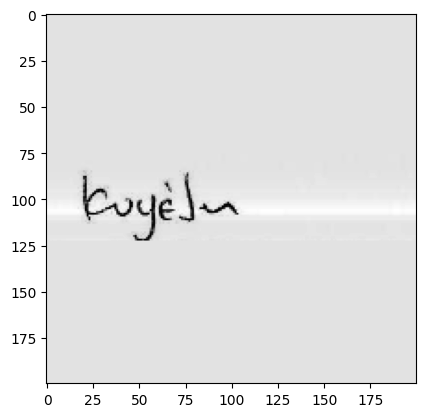

In [16]:
import matplotlib.pyplot as plt
train_labels = np.load('../labels_and_paths/train_labels.npy')

# check an object from the dataset
unique_train_labels = np.unique(train_labels)
print(unique_train_labels[[y_train[10]]])
plt.imshow(X_train[10], cmap='gray')  # graph it
plt.show()